# "PBDR" point design freeze
March/April 2023

This notebook created 2/23/2024.



In [45]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import yaml
import toml
from jbolo_funcs import *

# Make inline plots in this notebook, make them reasonable sizes, and with legible font size
%matplotlib inline
plt.rcParams.update({'font.size': 12})
plt.rcParams['figure.figsize'] = [12, 8]

#sys.path   #use for debugging

In [11]:
# List what yaml files you have so you can choose one for the next line.
!ls yamls 

splatyaml = 'yamls/SPLAT_20230409.yaml'
chlatyaml = 'yamls/CHLAT_20230409.yaml'
satyaml =   'yamls/SAT_20230409.yaml'

CHLAT_20230409.yaml SAT_20230409.yaml   SPLAT_20230409.yaml old


# Load Psats for the CHLAT and SPLAT


In [23]:
Psats = toml.load('Final_psats.toml')

In [24]:
Psats

{'SPLAT': {'ULF': 4.0824935046054344e-13,
  'LF_1': 4.969797252013119e-13,
  'LF_2': 2.8805805021034707e-12,
  'MF_1': 3.824657039888513e-12,
  'MF_2': 1.0687136813289652e-11,
  'HF_1': 3.0242789544009804e-11,
  'HF_2': 4.390012292794283e-11},
 'CHLAT': {'ULF': 4.0824935046054344e-13,
  'LF_1': 4.969797252013119e-13,
  'LF_2': 2.8805805021034707e-12,
  'MF_1': 3.824657039888513e-12,
  'MF_2': 1.0687136813289652e-11,
  'HF_1': 3.0242789544009804e-11,
  'HF_2': 4.390012292794283e-11},
 'AVG': {'ULF': 4.0824935046054344e-13,
  'LF_1': 4.969797252013119e-13,
  'LF_2': 2.8805805021034707e-12,
  'MF_1': 3.824657039888513e-12,
  'MF_2': 1.0687136813289652e-11,
  'HF_1': 3.0242789544009804e-11,
  'HF_2': 4.390012292794283e-11},
 'SAT': {'LF_1': 1.1245634576466702e-12,
  'LF_2': 4.809996349637259e-12,
  'MF_1_1': 7.473073210516627e-12,
  'MF_2_1': 7.30773335452925e-12,
  'MF_1_2': 1.0427773338560534e-11,
  'MF_2_2': 1.1057941029109084e-11,
  'HF_1': 2.4112758288378876e-11,
  'HF_2': 3.051796251

In [34]:
Popts={'SAT':{}, 'SPLAT':{},'CHLAT':{}}
NET_NCs = {'SAT':{}, 'SPLAT':{}, 'CHLAT':{} }

tel_list = ['SAT', 'CHLAT', 'SPLAT']
yaml_dict = {'SAT':satyaml, 'CHLAT':chlatyaml, 'SPLAT':splatyaml}

module_efficiency_vec = np.arange(0.5,0.9,0.01)


for tel in tel_list:
    print(tel)
    if 'sim' in locals():
        sim.clear()
    sim = yaml.safe_load(open(yaml_dict[tel]))
    sim['bolo_config']['psat_method']='specified'

    for ch in sim['channels'].keys():
        Popts[tel][ch] = np.array([])
        NET_NCs[tel][ch] = np.array([])

    for module_efficiency in module_efficiency_vec:
        if 'outputs' in sim.keys():
            sim['outputs'].clear()
        for ch in sim['channels'].keys():
            sim['channels'][ch]['psat']=Psats[tel][ch]
            sim['channels'][ch]['det_eff'] = module_efficiency
            
        run_optics(sim)
        run_bolos(sim)
        
        # Save the optical powers and NETs to numpy arrays
        for ch in sim['outputs'].keys():
            Popts[tel][ch]=np.append(Popts[tel][ch],1e12*sim['outputs'][ch]['P_opt'])
            NET_NCs[tel][ch]=np.append(NET_NCs[tel][ch],1e6*sim['outputs'][ch]['NET_NC_total'] ) # single detector NETs


    

SAT
CHLAT
SPLAT


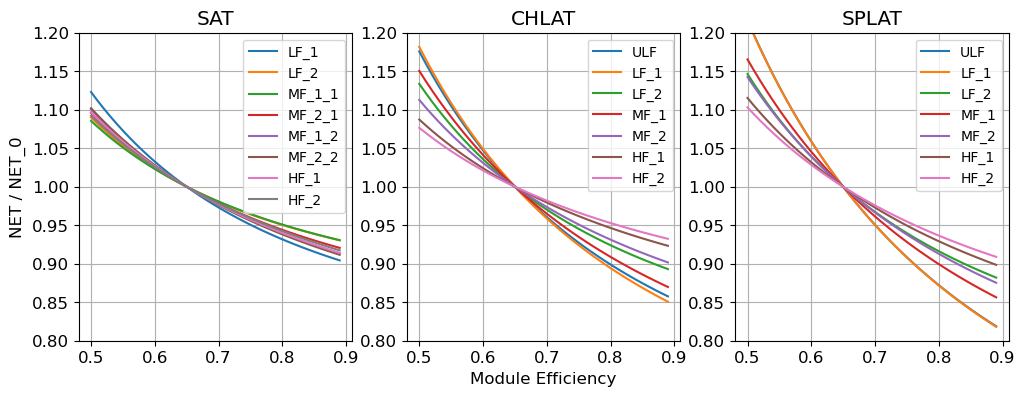

In [63]:
plt.rcParams['figure.figsize'] = [12, 4]
plt.clf()

difference_array = np.abs(module_efficiency_vec - 0.65)
ii = difference_array.argmin()


tel = 'SAT'
plt.subplot(1,3,1)
for ch in NET_NCs[tel].keys():
    plt.plot(module_efficiency_vec,NET_NCs[tel][ch]/NET_NCs[tel][ch][ii], label=ch)
    plt.legend(fontsize=10)
plt.title(tel)
plt.ylabel('NET / NET_0')
plt.ylim(0.8,1.2)
plt.grid()

tel = 'CHLAT'
plt.subplot(1,3,2)
for ch in NET_NCs[tel].keys():
    plt.plot(module_efficiency_vec,NET_NCs[tel][ch]/NET_NCs[tel][ch][ii], label=ch)
plt.legend(fontsize=10)
plt.title(tel)
plt.ylim(0.8,1.2)
plt.xlabel('Module Efficiency')
plt.grid()

tel = 'SPLAT'
plt.subplot(1,3,3)
for ch in NET_NCs[tel].keys():
    plt.plot(module_efficiency_vec,NET_NCs[tel][ch]/NET_NCs[tel][ch][ii], label=ch)
plt.legend(fontsize=10)
plt.title(tel)
plt.ylim(0.8,1.2)
plt.grid()
